In [142]:
cd \\niell-v2-w7\freely_moving_ephys\ephys_recordings\092820\J524RT\outputs_Oct07a

\\niell-v2-w7\freely_moving_ephys\ephys_recordings\092820\J524RT\outputs_Oct07a


In [143]:
ls

 Volume in drive Z is 4tb v3
 Volume Serial Number is 7E54-BBD3

 Directory of Z:\ephys_recordings\092820\J524RT\outputs_Oct07a

10/08/2020  12:45 AM    <DIR>          .
10/08/2020  12:45 AM    <DIR>          ..
10/07/2020  11:39 PM         3,707,007 092820_J524RT_fm1_ephys.json
10/07/2020  11:46 PM       563,461,730 092820_J524RT_fm1_REYE_plot.avi
10/08/2020  12:04 AM     1,962,888,524 092820_J524RT_fm1Reye.nc
10/08/2020  12:30 AM     1,486,082,083 092820_J524RT_fm1world.nc
10/08/2020  12:30 AM        31,427,090 092820_J524RT_ir_led_hf_REYE_plot.avi
10/08/2020  12:31 AM       143,201,005 092820_J524RT_ir_led_hfReye.nc
10/08/2020  12:32 AM       168,541,489 092820_J524RT_ir_led_hfworld.nc
10/08/2020  12:32 AM         1,167,980 092820_J524RT_whitenoise_hf_ephys.json
10/08/2020  12:36 AM       216,068,212 092820_J524RT_whitenoise_hf_REYE_plot.avi
10/08/2020  12:44 AM       949,163,053 092820_J524RT_whitenoise_hfReye.nc
10/08/2020  12:52 AM     1,096,477,014 092820_J524RT_whitenoise_hfwor

In [246]:
from netCDF4 import Dataset
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import pickle
import time
from matplotlib.animation import FFMpegWriter
import matplotlib as mpl 
import wavio
mpl.rcParams['animation.ffmpeg_path'] = r'C:\Program Files\ffmpeg\bin\ffmpeg.exe'
from scipy.interpolate import interp1d
import mhmovie

C:\ProgramData\Anaconda3\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [158]:
world_data = xr.open_dataset(r'092820_J524RT_fm1world.nc')
world_vid = np.uint8(world_data['WORLD_video'])
worldT = world_data.timestamps
world_data


<xarray.Dataset>
Dimensions:      (frame: 60977, height: 240, width: 320)
Coordinates:
  * frame        (frame) int64 0 1 2 3 4 5 ... 60972 60973 60974 60975 60976
    timestamps   (frame) float64 1.564e+04 1.564e+04 ... 1.683e+04 1.683e+04
Dimensions without coordinates: height, width
Data variables:
    WORLD_times  (frame) float64 ...
    WORLD_video  (frame, height, width) int8 24 -113 108 115 ... 114 113 114 113

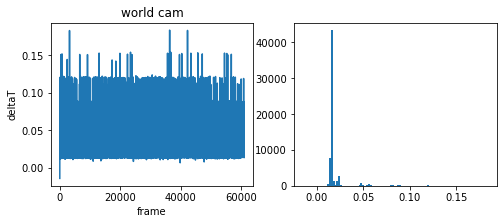

In [162]:
fig, axs = plt.subplots(1,2,figsize=(8,3))
axs[0].plot(np.diff(worldT)); axs[0].set_xlabel('frame'); axs[0].set_ylabel('deltaT'); axs[0].set_title('world cam')
axs[1].hist(np.diff(worldT),100);

Text(0.5, 1.0, 'mean worldcam')

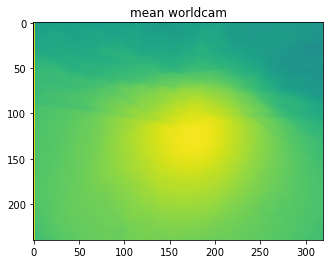

In [163]:
plt.imshow(np.mean(np.uint8(world_vid),axis=0)); plt.title('mean worldcam')

In [164]:
ephys_data = pd.read_json('092820_J524RT_fm1_ephys.json')
ephys_data


,Amplitude,ContamPct,KSLabel,amp,ch,depth,fr,group,n_spikes,sh,spikeT,waveform,t0
0,383.9,8.9,good,31.474401,0,1,9.410262,good,11219,0,"[0.005200000000000001, 0.1723, 0.3153666667, 0...","[-0.0043589817, -0.0055342452, -0.0068012639, ...",44440.826854
1,315.4,39.3,mua,23.014782,0,1,4.292032,noise,5117,0,"[0.3441333333, 0.37420000000000003, 0.6085, 0....","[-0.0084317792, -0.0073682186, -0.0058965264, ...",44440.826854
2,427.5,6.7,good,33.772884,0,1,4.480758,good,5342,0,"[0.2502333333, 0.3950666667, 0.4000333333, 0.4...","[7.20132e-05, -0.014391127, -0.010996173100000...",44440.826854
3,212.9,0.3,good,14.963311,3,4,52.519312,noise,62614,0,"[0.0135, 0.0301666667, 0.038666666700000005, 0...","[-0.0052585383, 0.037936274, 0.0337595865, 0.0...",44440.826854
4,419.4,7688.6,mua,14.540514,5,6,0.119945,noise,143,0,"[1.2057333333, 1.2063333333, 1.2069333333, 1.2...","[-0.0398195833, -0.040726833000000004, -0.0230...",44440.826854
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,227.9,41.4,mua,15.748152,14,15,1.347079,noise,1606,0,"[0.1720666667, 1.2078, 1.2083, 1.2083666667, 5...","[-0.028306337100000002, -0.0157045126, -0.0144...",44440.826854
61,407.9,433.3,mua,24.803701,12,13,0.102331,noise,122,0,"[1.2079666667, 1.2081333333, 4.1210333333, 24....","[0.0061434517, -0.011211108400000001, -0.01099...",44440.826854
62,444.9,64.6,mua,28.681179,15,16,1.807569,noise,2155,0,"[0.4181, 1.2067666667, 1.7301666667000002, 4.2...","[0.0123204067, -0.0176212471, -0.010032489, -0...",44440.826854
63,880.2,7.3,good,46.786968,5,6,2.664801,good,3177,0,"[0.1915, 0.9548333333000001, 1.2069333333, 1.2...","[0.0278140716, 0.018410490800000002, 0.0204440...",44440.826854


In [165]:
ephysT0 = ephys_data.iloc[0,12]
ephysT0

44440.826854

In [166]:
goodcells = ephys_data.loc[ephys_data['group']=='good']
goodcells.shape
units = goodcells.index.values
units

array([ 0,  2,  5, 13, 22, 23, 27, 31, 35, 36, 43, 63, 64], dtype=int64)

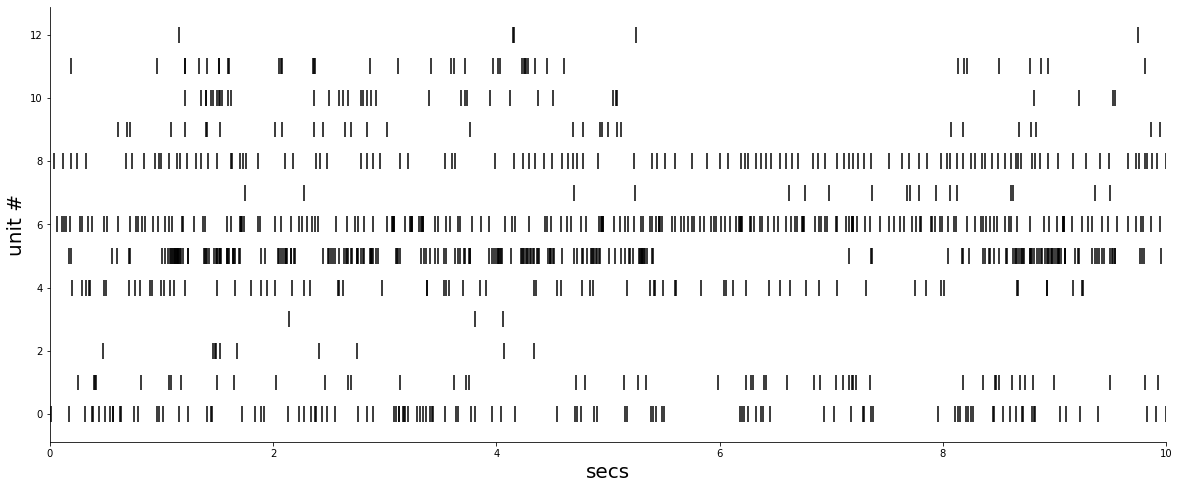

In [214]:
#spike rasters
fig, ax = plt.subplots(figsize=(20,8))
ax.fontsize = 20
for i,ind in enumerate(goodcells.index):
   plt.vlines(goodcells.at[ind,'spikeT'],i-0.25,i+0.25)
   plt.xlim(0, 10); plt.xlabel('secs',fontsize = 20); plt.ylabel('unit #',fontsize=20)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig('spikeraster.pdf')



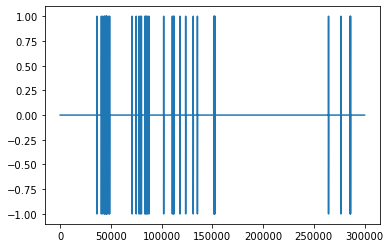

In [244]:
# generate wave file
sp =np.array(ephys_data.at[units[10],'spikeT'])

datarate = 30000
rate = 44100    # samples per second
Tmax = 10           # sample duration (seconds)
f = 440.0       # sound frequency (Hz)
# Compute waveform samples
t = np.linspace(0, Tmax, Tmax*datarate,endpoint=False)
x = np.zeros(np.size(t))
for spt in sp[sp<Tmax]:
    x[np.int64(spt*datarate) : np.int64(spt*datarate +30)] = 1
    x[np.int64(spt*datarate)+31 : np.int64(spt*datarate +60)] =- 1
plt.plot(x)
    

# Write the samples to a file
wavio.write("spike.wav", x, datarate, sampwidth=1)


<xarray.DataArray 'timestamps' (frame: 64186)>
array([15640.429206, 15640.414749, 15640.430973, ..., 16833.046211,
       16833.062435, 16833.078659])
Coordinates:
  * frame       (frame) int64 0 1 2 3 4 5 ... 64181 64182 64183 64184 64185
    timestamps  (frame) float64 1.564e+04 1.564e+04 ... 1.683e+04 1.683e+04

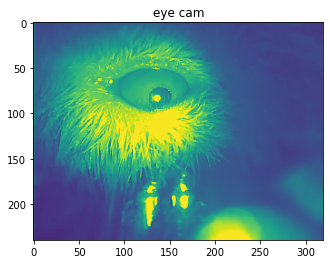

In [188]:
eye_data = xr.open_dataset("092820_J524RT_fm1Reye.nc")
eye_vid = np.uint8(eye_data['REYE_video'])
plt.imshow(eye_vid[0,:,:]); plt.title('eye cam')
eyeT = eye_data.timestamps
eyeT

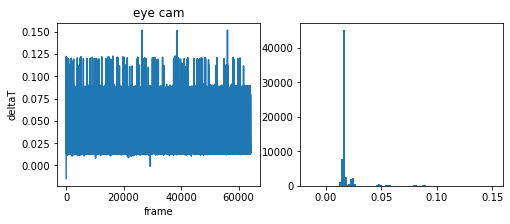

In [189]:
fig, axs = plt.subplots(1,2,figsize=(8,3))
axs[0].plot(np.diff(eyeT)); axs[0].set_xlabel('frame'); axs[0].set_ylabel('deltaT'); axs[0].set_title('eye cam')
axs[1].hist(np.diff(eyeT),100);

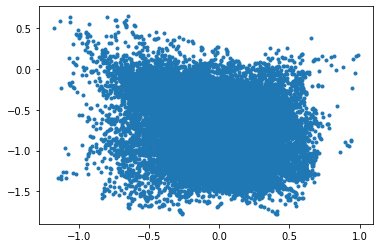

In [174]:
eye_params = eye_data['REYE_ellipse_params']
plt.plot(eye_params.sel(ellipse_params = 'theta'),eye_params.sel(ellipse_params = 'phi'),'.')

In [191]:
eyeT = eye_data.timestamps + 8*60*60 - ephysT0
worldT = world_data.timestamps + 8*60*60 - ephysT0
eyeT, worldT

(<xarray.DataArray 'timestamps' (frame: 64186)>
 array([-3.97648000e-01, -4.12105000e-01, -3.95881000e-01, ...,
         1.19221936e+03,  1.19223558e+03,  1.19225180e+03])
 Coordinates:
   * frame       (frame) int64 0 1 2 3 4 5 ... 64181 64182 64183 64184 64185
     timestamps  (frame) float64 1.564e+04 1.564e+04 ... 1.683e+04 1.683e+04,
 <xarray.DataArray 'timestamps' (frame: 60977)>
 array([-3.97795000e-01, -4.12112000e-01, -3.95875000e-01, ...,
         1.19221205e+03,  1.19223374e+03,  1.19224997e+03])
 Coordinates:
   * frame       (frame) int64 0 1 2 3 4 5 ... 60972 60973 60974 60975 60976
     timestamps  (frame) float64 1.564e+04 1.564e+04 ... 1.683e+04 1.683e+04)

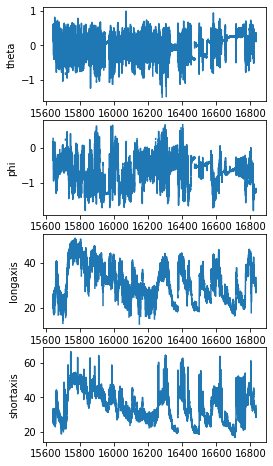

In [190]:
fig,axs = plt.subplots(4,1,figsize = (4,8))
for i,val in enumerate(eye_params.ellipse_params[0:4]):
    axs[i].plot(eyeT,eye_params.sel(ellipse_params = val))
    axs[i].set_ylabel(val.values)
    

In [192]:
dEye = np.diff(eye_params.sel(ellipse_params = 'theta'))*180/3.14159
eye_vid.shape

(64186, 240, 320)

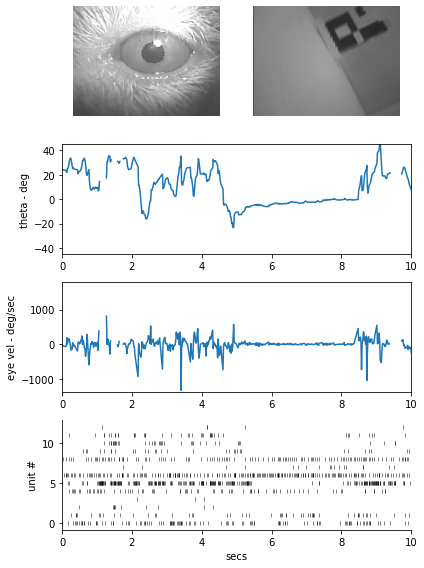

In [227]:
fig = plt.figure(figsize = (6,8))
gs = fig.add_gridspec(4,2)
axEye = fig.add_subplot(gs[0,0])
axWorld = fig.add_subplot(gs[0,1])
axTheta = fig.add_subplot(gs[1,:])
axdTheta = fig.add_subplot(gs[2,:])
axR = fig.add_subplot(gs[3,:])
#axRad = fig.add_subplot(gs[3,:])

tr = [0,10]
fr = np.mean(tr) # time for frame
eyeFr = np.abs(eyeT-fr).argmin(dim = "frame")
worldFr = np.abs(worldT-fr).argmin(dim = "frame")

axEye.cla(); axEye.axis('off'); 
axEye.imshow(eye_vid[eyeFr,:,:],'gray',vmin=0,vmax=255,aspect = "equal")
#axEye.plot(eye_params.sel(ellipse_params = 'X0')[fr]/2,eye_params.sel(ellipse_params = 'Y0')[fr]/2,'r.')
axEye.set_xlim(40,200); axEye.set_ylim(0,120)

axWorld.cla();  axWorld.axis('off'); 
axWorld.imshow(world_vid[worldFr,:,:],'gray',vmin=0,vmax=255,aspect = "equal")
   
#plot eye position
axTheta.cla()
axTheta.plot(eyeT,eye_params.sel(ellipse_params = 'theta')*180/3.14159)
axTheta.set_xlim(tr[0],tr[1]); 
axTheta.set_ylabel('theta - deg'); axTheta.set_ylim(-45,45)

# plot eye velocity
axdTheta.cla()
axdTheta.plot(eyeT[0:-1],dEye*60); ax.set_ylabel('dtheta')
#sacc = np.transpose(np.where(np.abs(dEye)>10))
#axdTheta.plot(sacc,np.sign(dEye[sacc])*20,'.')
axdTheta.set_xlim(tr[0],tr[1]); 
axdTheta.set_ylim(-23*60,30*60); axdTheta.set_ylabel('eye vel - deg/sec')

#axRad.cla()
#axRad.plot(eye_params.sel(ellipse_params = 'longaxis')[frameRange])
#axRad.set_xlim(0,frameRange[-1]-frameRange[0]); 
#axRad.set_ylabel('radius'); axRad.set_xlabel('frame #'); axRad.set_ylim(0,40)

# plot spikes
axR.fontsize = 20
for i,ind in enumerate(goodcells.index):
    axR.vlines(goodcells.at[ind,'spikeT'],i-0.25,i+0.25,'k',linewidth=0.5)
axR.set_xlim(tr[0],tr[1]); axR.set_xlabel('secs'); axR.set_ylabel('unit #')
axR.spines['right'].set_visible(False)
axR.spines['top'].set_visible(False)

plt.tight_layout()

plt.savefig('cams_eyes_spikes_092820_fm1.pdf')

In [ ]:
eyeInterp = interp1d(eyeT,eye_vid,axis=0)
worldInterp = interp1d(worldT,world_vid,axis=0)

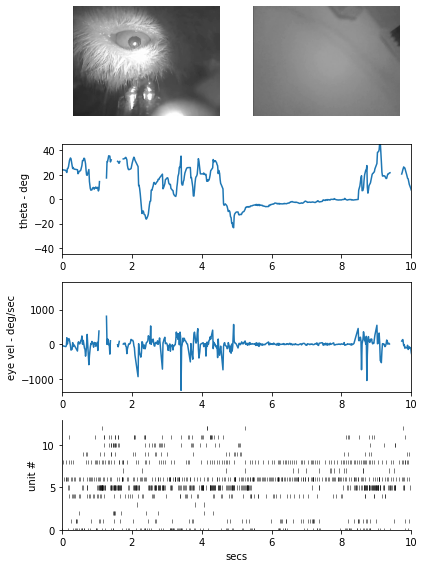

In [241]:
fig = plt.figure(figsize = (6,8))
gs = fig.add_gridspec(4,2)
axEye = fig.add_subplot(gs[0,0])
axWorld = fig.add_subplot(gs[0,1])
axTheta = fig.add_subplot(gs[1,:])
axdTheta = fig.add_subplot(gs[2,:])
axR = fig.add_subplot(gs[3,:])
#axRad = fig.add_subplot(gs[3,:])

tr = [0,10]
fr = np.mean(tr) # time for frame
eyeFr = np.abs(eyeT-fr).argmin(dim = "frame")
worldFr = np.abs(worldT-fr).argmin(dim = "frame")

axEye.cla(); axEye.axis('off'); 
axEye.imshow(eye_vid[eyeFr,:,:],'gray',vmin=0,vmax=255,aspect = "equal")
#axEye.plot(eye_params.sel(ellipse_params = 'X0')[fr]/2,eye_params.sel(ellipse_params = 'Y0')[fr]/2,'r.')
axEye.set_xlim(40,200); axEye.set_ylim(0,120)

axWorld.cla();  axWorld.axis('off'); 
axWorld.imshow(world_vid[worldFr,:,:],'gray',vmin=0,vmax=255,aspect = "equal")
   
#plot eye position
axTheta.cla()
axTheta.plot(eyeT,eye_params.sel(ellipse_params = 'theta')*180/3.14159)
axTheta.set_xlim(tr[0],tr[1]); 
axTheta.set_ylabel('theta - deg'); axTheta.set_ylim(-45,45)

# plot eye velocity
axdTheta.cla()
axdTheta.plot(eyeT[0:-1],dEye*60); ax.set_ylabel('dtheta')
#sacc = np.transpose(np.where(np.abs(dEye)>10))
#axdTheta.plot(sacc,np.sign(dEye[sacc])*20,'.')
axdTheta.set_xlim(tr[0],tr[1]); 
axdTheta.set_ylim(-23*60,30*60); axdTheta.set_ylabel('eye vel - deg/sec')

#axRad.cla()
#axRad.plot(eye_params.sel(ellipse_params = 'longaxis')[frameRange])
#axRad.set_xlim(0,frameRange[-1]-frameRange[0]); 
#axRad.set_ylabel('radius'); axRad.set_xlabel('frame #'); axRad.set_ylim(0,40)

# plot spikes
axR.fontsize = 20
for i,ind in enumerate(goodcells.index):
    axR.vlines(goodcells.at[ind,'spikeT'],i-0.25,i+0.25,'k',linewidth=0.5)
axR.set_xlim(tr[0],tr[1]); axR.set_ylim(0 , 13); axR.set_xlabel('secs'); axR.set_ylabel('unit #')
axR.spines['right'].set_visible(False)
axR.spines['top'].set_visible(False)

plt.tight_layout()


writer = FFMpegWriter(fps=30)
with writer.saving(fig, "writer_test.mp4", 100):
    for t in np.arange(tr[0],tr[1],1/30):
        
        axEye.cla(); axEye.axis('off'); 
        axEye.imshow(eyeInterp(t),'gray',vmin=0,vmax=255,aspect = "equal")
        
        axWorld.cla(); axWorld.axis('off'); 
        axWorld.imshow(worldInterp(t),'gray',vmin=0,vmax=255,aspect = "equal")
        
        ln = axR.vlines(t,0,30,'b')
        writer.grab_frame()
        ln.remove()
        
        
            


In [236]:
np.arange(tr[0],tr[1],1/30)



array([0.        , 0.03333333, 0.06666667, 0.1       , 0.13333333,
       0.16666667, 0.2       , 0.23333333, 0.26666667, 0.3       ,
       0.33333333, 0.36666667, 0.4       , 0.43333333, 0.46666667,
       0.5       , 0.53333333, 0.56666667, 0.6       , 0.63333333,
       0.66666667, 0.7       , 0.73333333, 0.76666667, 0.8       ,
       0.83333333, 0.86666667, 0.9       , 0.93333333, 0.96666667,
       1.        , 1.03333333, 1.06666667, 1.1       , 1.13333333,
       1.16666667, 1.2       , 1.23333333, 1.26666667, 1.3       ,
       1.33333333, 1.36666667, 1.4       , 1.43333333, 1.46666667,
       1.5       , 1.53333333, 1.56666667, 1.6       , 1.63333333,
       1.66666667, 1.7       , 1.73333333, 1.76666667, 1.8       ,
       1.83333333, 1.86666667, 1.9       , 1.93333333, 1.96666667,
       2.        , 2.03333333, 2.06666667, 2.1       , 2.13333333,
       2.16666667, 2.2       , 2.23333333, 2.26666667, 2.3       ,
       2.33333333, 2.36666667, 2.4       , 2.43333333, 2.46666

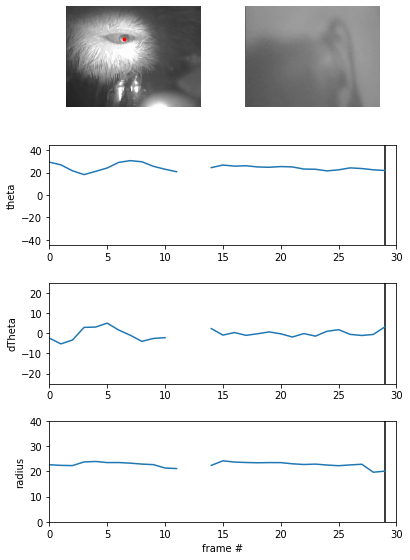

In [76]:
fig = plt.figure(figsize = (6,8))
gs = fig.add_gridspec(4,2)
axEye = fig.add_subplot(gs[0,0])
axWorld = fig.add_subplot(gs[0,1])
axTheta = fig.add_subplot(gs[1,:])
axdTheta = fig.add_subplot(gs[2,:])
axR = fig.add_subplot(gs[3,:])

frameRange = range(30)
with writer.saving(fig, "writer_test.mp4", 100):
    for fr in frameRange:

        axEye.cla(); axEye.axis('off'); 
        axEye.imshow(eye_vid[fr,:,:],'gray',vmin=0,vmax=255,aspect = "equal")
        axEye.plot(eye_params.sel(ellipse_params = 'X0')[fr]/2,eye_params.sel(ellipse_params = 'Y0')[fr]/2,'r.')
       
        
        axWorld.cla();  axWorld.axis('off'); 
        axWorld.imshow(world_vid[fr,:,:],'gray',vmin=0,vmax=255,aspect = "equal")
   
        
        axTheta.cla()
        axTheta.plot(eye_params.sel(ellipse_params = 'theta')[frameRange]*180/3.14159)
        axTheta.set_xlim(frameRange[0],frameRange[-1]+1); axTheta.set_ylabel('theta'); axTheta.set_ylim(-45,45)
        axTheta.vlines(fr,-45,45)

        axdTheta.cla()
        axdTheta.plot(dEye[frameRange]); ax.set_ylabel('dtheta')
       # sacc = np.transpose(np.where(np.abs(dEye[frameRange])>10))
       # axdTheta.plot(sacc,np.sign(dEye[sacc])*20,'.')
        axdTheta.set_xlim(frameRange[0],frameRange[-1]+1); axdTheta.set_ylim(-25,25); axdTheta.set_ylabel('dTheta')
        axdTheta.vlines(fr,-25,25)

        axR.cla()
        axR.plot(eye_params.sel(ellipse_params = 'longaxis')[frameRange])
        axR.set_xlim(frameRange[0],frameRange[-1]+1); axR.set_ylabel('radius'); axR.set_xlabel('frame #')
        axR.set_ylim(0,40)
        axR.vlines(fr,0,40)
        
        plt.tight_layout()
        writer.grab_frame()

In [206]:
plt.hist(np.float(np.diff(eye_data.timestamps)))

TypeError: only size-1 arrays can be converted to Python scalars

In [212]:
eye_data.timestamps.total_seconds()

AttributeError: 'DataArray' object has no attribute 'total_seconds'

In [245]:
ffmpeg


NameError: name 'ffmpeg' is not defined

In [264]:
from mhmovie.code import *
m = movie("cams_eyes_spikes_092820_fm1.mp4")
mu = music('spike.wav')
final = m+mu
final.save(r'.\test.mp4')

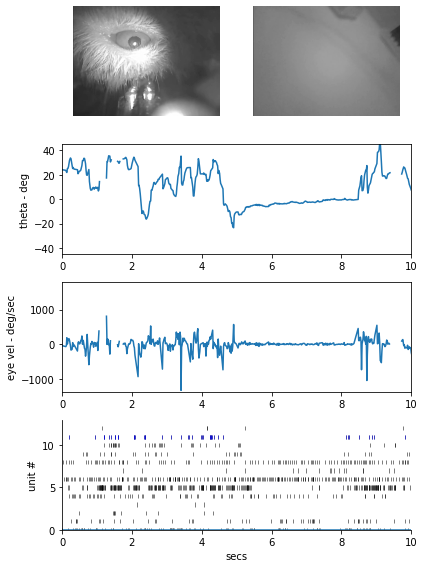

In [269]:
# make movie and sound

#unite to plot/record
this_unit = 11

#set up figure
fig = plt.figure(figsize = (6,8))
gs = fig.add_gridspec(4,2)
axEye = fig.add_subplot(gs[0,0])
axWorld = fig.add_subplot(gs[0,1])
axTheta = fig.add_subplot(gs[1,:])
axdTheta = fig.add_subplot(gs[2,:])
axR = fig.add_subplot(gs[3,:])
#axRad = fig.add_subplot(gs[3,:])

#timerange and center frame (only)
tr = [0,10]
fr = np.mean(tr) # time for frame
eyeFr = np.abs(eyeT-fr).argmin(dim = "frame")
worldFr = np.abs(worldT-fr).argmin(dim = "frame")

axEye.cla(); axEye.axis('off'); 
axEye.imshow(eye_vid[eyeFr,:,:],'gray',vmin=0,vmax=255,aspect = "equal")
#axEye.plot(eye_params.sel(ellipse_params = 'X0')[fr]/2,eye_params.sel(ellipse_params = 'Y0')[fr]/2,'r.')
axEye.set_xlim(40,200); axEye.set_ylim(0,120)

axWorld.cla();  axWorld.axis('off'); 
axWorld.imshow(world_vid[worldFr,:,:],'gray',vmin=0,vmax=255,aspect = "equal")
   
#plot eye position
axTheta.cla()
axTheta.plot(eyeT,eye_params.sel(ellipse_params = 'theta')*180/3.14159)
axTheta.set_xlim(tr[0],tr[1]); 
axTheta.set_ylabel('theta - deg'); axTheta.set_ylim(-45,45)

# plot eye velocity
axdTheta.cla()
axdTheta.plot(eyeT[0:-1],dEye*60); ax.set_ylabel('dtheta')
#sacc = np.transpose(np.where(np.abs(dEye)>10))
#axdTheta.plot(sacc,np.sign(dEye[sacc])*20,'.')
axdTheta.set_xlim(tr[0],tr[1]); 
axdTheta.set_ylim(-23*60,30*60); axdTheta.set_ylabel('eye vel - deg/sec')

#plot radius?
#axRad.cla()
#axRad.plot(eye_params.sel(ellipse_params = 'longaxis')[frameRange])
#axRad.set_xlim(0,frameRange[-1]-frameRange[0]); 
#axRad.set_ylabel('radius'); axRad.set_xlabel('frame #'); axRad.set_ylim(0,40)

# plot spikes
axR.fontsize = 20
for i,ind in enumerate(goodcells.index):
    axR.vlines(goodcells.at[ind,'spikeT'],i-0.25,i+0.25,'k',linewidth=0.5)
axR.vlines(goodcells.at[units[this_unit],'spikeT'],this_unit-0.25,this_unit+0.25,'b',linewidth=0.5)

axR.set_xlim(tr[0],tr[1]); axR.set_ylim(0 , 13); axR.set_xlabel('secs'); axR.set_ylabel('unit #')
axR.spines['right'].set_visible(False)
axR.spines['top'].set_visible(False)

plt.tight_layout()

# now animate
writer = FFMpegWriter(fps=30)
with writer.saving(fig, "eye_world_spikes_092820_fm1_11.mp4", 100):
    for t in np.arange(tr[0],tr[1],1/30):
        
        # show eye and world frames
        axEye.cla(); axEye.axis('off'); 
        axEye.imshow(eyeInterp(t),'gray',vmin=0,vmax=255,aspect = "equal")
        
        axWorld.cla(); axWorld.axis('off'); 
        axWorld.imshow(worldInterp(t),'gray',vmin=0,vmax=255,aspect = "equal")
        
        #plot line for time, then remove
        ln = axR.vlines(t,0,30,'b')
        writer.grab_frame()
        ln.remove()
        
###



# generate wave file
sp =np.array(ephys_data.at[units[this_unit],'spikeT'])-tr[0]

datarate = 30000
f = 440.0       # sound frequency (Hz)
# Compute waveform samples
tmax = tr[1]-tr[0]
t = np.linspace(0, tr[1]-tr[0], (tr[1]-tr[0])*datarate,endpoint=False)
x = np.zeros(np.size(t))
for spt in sp[sp<tmax]:
    x[np.int64(spt*datarate) : np.int64(spt*datarate +30)] = 1
    x[np.int64(spt*datarate)+31 : np.int64(spt*datarate +60)] =- 1
plt.plot(x)
    

# Write the samples to a file
wavio.write("spike11.wav", x, datarate, sampwidth=1)

In [ ]:
#https://cloudconvert.com/wav-to-mp3
# https://www.kapwing.com/tools/add-music-to-video